# Identity by descent

If we compare the genome sequences of two parasites, we can identify segments of the genome where their haplotypes are identical.  We call these *shared haplotype segments*.

Identity by descent (IBD) is a population genetic term that refers to genome sequences that are identical between individuals due to recent common ancestry. There are various ways to estimate IBD from genome sequencing data, but we can make the simplifying assumption that they detect shared haplotype segments of greater than about 2 centimorgans. 

The proportion of the genome occupied by shared haplotype segments of >*k* centimorgans can be crudely approximated by [the mean haplotype homozygosity of a locus of $k$ centimorgans](https://d-kwiat.github.io/gtg/haplotype-homozygosity.html).  Thus if we define shared haplotype segments of $>2$ centimorgans as IBD, then the proportion of the genome that is IBD is approximated by the mean homozygosity of a haplotype locus of 2 centimorgans.

Let $\gamma$ be the mean haplotype homozygosity of a 2 centimorgan locus, which corresponds to 27 kilobases if we assume that 1 centimorgan is equivalent to approximately 13.5 kb on average.  

Below we show how $\gamma$ varies with different values of `N` (effective number of hosts $N_h$), `Q` (quantum of transmission $Q$) and `X` (crossing rate of transmission chains $\chi$). This shows that:

* $\gamma_S$ (approximating IBD in a local subpopulation) declines rapidly with increasing levels of $N_h$, $\chi$ and $Q$.  

* $\gamma_W$ (approximating mean within-host IBD) is high and independent of $N_h$ if there is no superinfection. 

In [1]:
! pip install coalestr
from coalestr import cs
import matplotlib.pyplot as plt

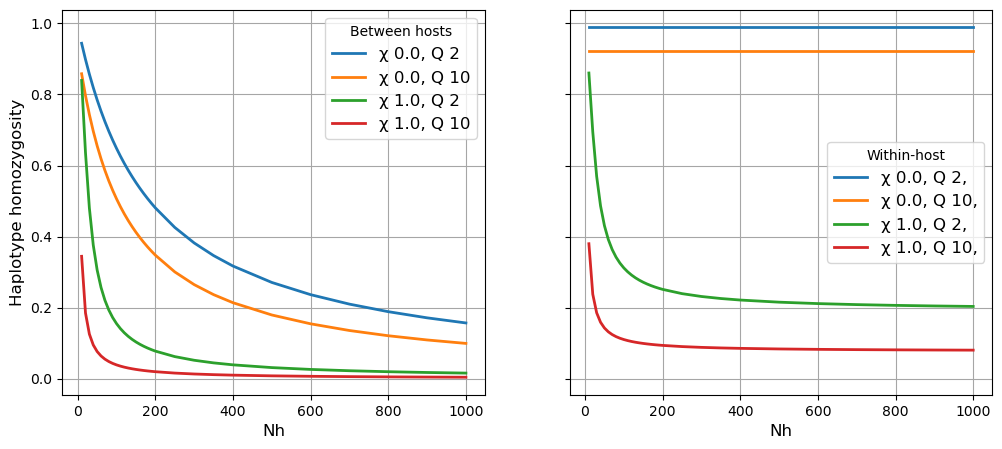

In [13]:
N_list = list(range(10, 201, 10)) + list(range(250, 401, 50)) + list (range(500, 1001, 100))
Q_list = [2, 10]
X_list = [0, 1]

duration = 10000 # duration of simulation in generation

fig, [a1, a2] = plt.subplots(1, 2, figsize = (12, 5), sharey = True)

for X in X_list:
    for Q in Q_list:
        
        beho_hap_hom = []
        wiho_hap_hom = []
        
        for N in N_list:
            history = [[duration, N, Q, X, 0]]  # t_his, Nh, Q, chi, migration
            my_pop = cs.Population(history)
            my_pop.get_coalescent(observe = "auto", show = False)
            my_pop.get_diversity(show = False)

            beho_hap_hom.append(my_pop.diversity[0,3]) # between-host haplotype homozygosity
            wiho_hap_hom.append(my_pop.diversity[0,4]) # within-host haplotype homozygosity

        a1.plot(N_list, beho_hap_hom, linewidth=2, label = '\u03C7 {0:.1f}, Q {1:.0f}'.format(X, Q))
        a2.plot(N_list, wiho_hap_hom, linewidth=2, label = '\u03C7 {0:.1f}, Q {1:.0f},'.format(X, Q))   


a1.set_xlabel("Nh", fontsize=12)
a1.set_ylabel("Haplotype homozygosity", fontsize=12)
a1.legend(title = 'Between hosts', frameon=True, fontsize=12)
a1.grid(visible=True, which='both', color='0.65', linestyle='-')

a2.set_xlabel("Nh", fontsize=12)
a2.legend(title = 'Within-host', frameon=True, fontsize=12)
a2.grid(visible=True, which='both', color='0.65', linestyle='-')

plt.show()